In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import array
import sklearn
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use("fivethirtyeight")#for plots
import os
import warnings
warnings.filterwarnings("ignore");
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [60]:
STC=pd.read_csv("Equites_Historical_Adjusted_Prices_Report 2.csv")

In [61]:
STC.head()

,Date,Open,High,Low,Close,Change,% Change,Volume Traded
0,3/11/2012,41.4,41.7,41.2,41.6,-0.1,-0.24,487410
1,4/11/2012,41.5,41.7,41.4,41.6,0.0,0.00,447349
2,5/11/2012,41.6,41.6,41.2,41.3,-0.3,-0.72,741787
3,6/11/2012,41.4,42.1,41.3,42.1,0.8,1.94,897098
4,7/11/2012,42.1,42.4,42.0,42.3,0.2,0.48,1267367


In [62]:
STC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269 entries, 0 to 2268
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2269 non-null   object 
 1   Open           2269 non-null   float64
 2   High           2269 non-null   float64
 3   Low            2269 non-null   float64
 4   Close          2269 non-null   float64
 5   Change         2269 non-null   float64
 6   % Change       2269 non-null   float64
 7   Volume Traded  2269 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 141.9+ KB


In [63]:
STC.mean()

Open                 78.238938
High                 78.943764
Low                  77.543610
Close                78.294945
Change                0.030516
% Change              0.053486
Volume Traded    789583.183781
dtype: float64

In [64]:
STC.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Change           float64
% Change         float64
Volume Traded      int64
dtype: object

In [65]:
STC.Date=pd.to_datetime(STC.Date)
STC['Date'].head()

0   2012-03-11
1   2012-04-11
2   2012-05-11
3   2012-06-11
4   2012-07-11
Name: Date, dtype: datetime64[ns]

In [66]:
STC.drop(['Open','High','Low','Change','% Change','Volume Traded'], axis=1 ,inplace=True)
STC

,Date,Close
0,2012-03-11,41.6
1,2012-04-11,41.6
2,2012-05-11,41.3
3,2012-06-11,42.1
4,2012-07-11,42.3
...,...,...
2264,2021-11-24,114.0
2265,2021-11-25,113.0
2266,2021-11-28,111.6
2267,2021-11-29,111.0


<AxesSubplot:xlabel='Date'>

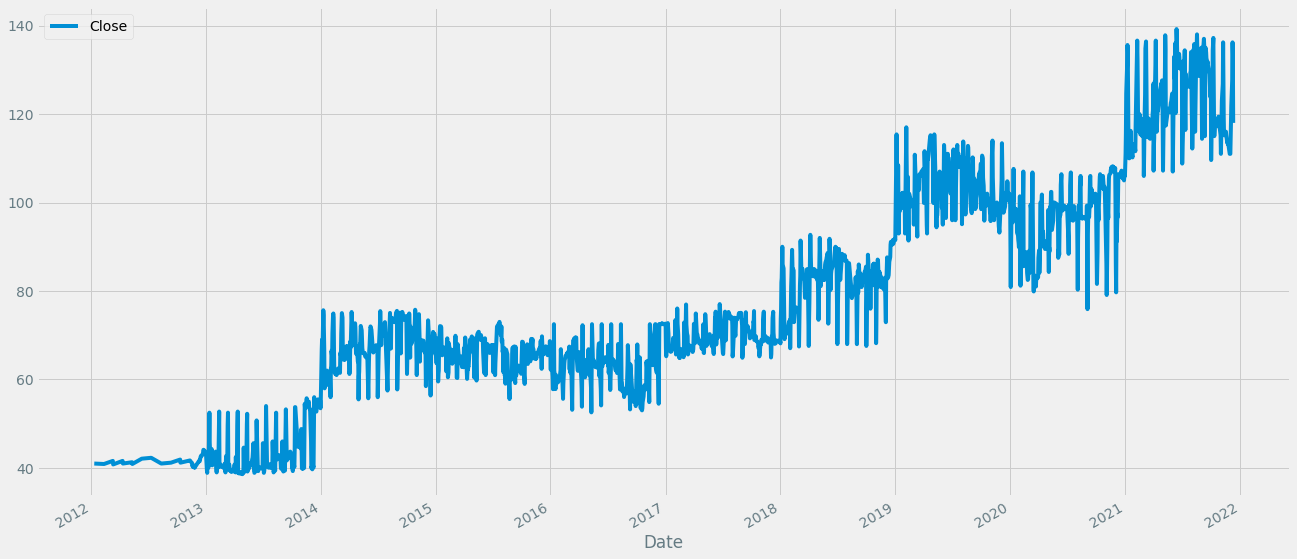

In [67]:
STC.plot(x="Date",y="Close",figsize=(20,10))


In [68]:
STC.mean()

Close    78.294945
dtype: float64

In [69]:
# NO! All are unique For each day
STC.index.is_unique


True

In [70]:
#to be organazation day by day 
STC.sort_index(ascending = True).head()


,Date,Close
0,2012-03-11,41.6
1,2012-04-11,41.6
2,2012-05-11,41.3
3,2012-06-11,42.1
4,2012-07-11,42.3


In [71]:
STC=STC.set_index('Date')
STC.head()

,Close
Date,
2012-03-11,41.6
2012-04-11,41.6
2012-05-11,41.3
2012-06-11,42.1
2012-07-11,42.3


In [72]:
# the best #of close through a month
STC_month = STC.resample('BM').mean()

STC_month

,Close
Date,
2012-01-31,41.000000
2012-02-29,40.900000
2012-03-30,41.200000
2012-04-30,41.300000
2012-05-31,41.100000
...,...
2021-08-31,129.733333
2021-09-30,128.320000
2021-10-29,119.200000


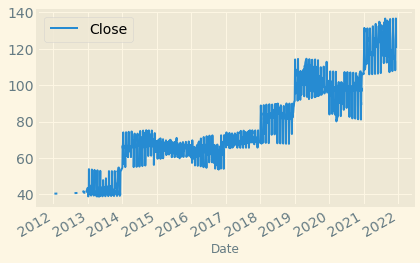

In [73]:
STC_ma =STC.rolling(window=9).mean()
STC_ma.plot(plt.style.use('Solarize_Light2')) 
figsize=(20,10)

# Treing & Teasting

In [74]:
X = STC.values
train_size = int(len(X) * 0.)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2269
Training Observations: 0
Testing Observations: 2269


In [75]:
STC_Train=STC[0:2042]
STC_Validate=STC[2043:2156]
STC_Test=STC[2157:2269]
print(STC_Train,STC_Validate,STC_Test)

            Close
Date             
2012-03-11   41.6
2012-04-11   41.6
2012-05-11   41.3
2012-06-11   42.1
2012-07-11   42.3
...           ...
2020-12-28  105.0
2020-12-29  106.0
2020-12-30  106.8
2020-12-31  106.0
2021-03-01  106.0

[2042 rows x 1 columns]             Close
Date             
2021-05-01  107.2
2021-06-01  107.0
2021-07-01  108.8
2021-10-01  109.6
2021-11-01  111.0
...           ...
2021-10-06  134.4
2021-06-13  139.2
2021-06-14  137.0
2021-06-15  133.8
2021-06-16  132.2

[113 rows x 1 columns]             Close
Date             
2021-06-20  132.4
2021-06-21  133.6
2021-06-22  132.8
2021-06-23  130.4
2021-06-24  131.0
...           ...
2021-11-24  114.0
2021-11-25  113.0
2021-11-28  111.6
2021-11-29  111.0
2021-11-30  111.0

[112 rows x 1 columns]


In [76]:
print(f"the size of the traing set size is ",STC_Train.shape)
print(f"the size of the validate set size is ",STC_Validate.shape)
print(f"the size of the training set size is ",STC_Test.shape)

the size of the traing set size is  (2042, 1)
the size of the validate set size is  (113, 1)
the size of the training set size is  (112, 1)


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(0,1,2))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print(x)
print(y)

0.13586329539593753
13.404291565150471


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(5,1,1))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print(x)
print(y)

0.14200926835813418
13.444469014483758


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(1,1,2))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print(x)
print(y)

0.14696498211650214
13.34170867890568


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(2,1,2))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print(x)
print(y)

0.1385040799095382
13.429268365289664


In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(3,1,2))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print(x)
print(y)

0.15158994877695897
13.346283536784881


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(0,1,0))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print(x)
print(y)

0.03155316021558008
13.443131014782603


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
model=ARIMA(STC_Train, order=(1,1,1))
result = model.fit()
#print result
start=1
end=len(STC_Train)
pred=result.predict(start=start,end=end,typ='levels')
#print pred
x=np.sqrt(metrics.mean_squared_error(STC_Train,pred))

start=len(STC_Train)
end=len(STC_Train)+len(STC_Validate)-1
pred=result.predict(start=start,end=end,typ='levels')
#print pred
y=np.sqrt(metrics.mean_squared_error(STC_Validate,pred))
print(x)
print(y)

0.13693820945091933
13.415027091372258


In [84]:
#we can split the time series into two contiguous sequences. 
#We can then calculate the mean and variance of each group of numbers and compare the values.
X = STC.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=59.926614, mean2=96.647093
variance1=119.746434, variance2=324.923088


In [85]:
#Running this example shows that the mean and variance values are different, but in the same ball-park^^^

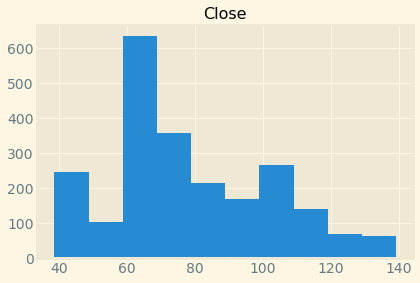

In [86]:
#Let’s check if assuming a Gaussian distribution makes sense
#in this case by plotting the values of the time series as a histogram.
from matplotlib import pyplot
STC.hist()
pyplot.show()

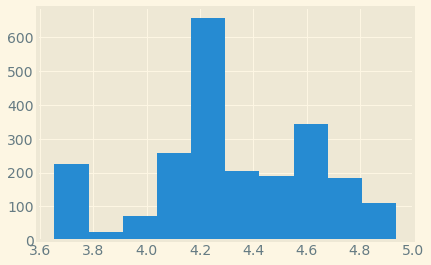

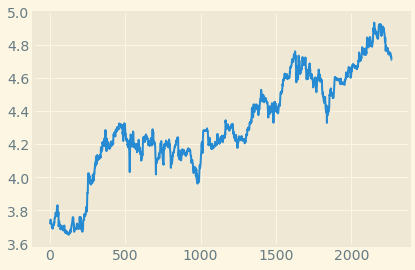

In [87]:
from numpy import log
X = STC.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [88]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.

In [89]:
X = STC.values
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4.073938, mean2=4.553521
variance1=0.041176, variance2=0.035384
